In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

Data source:
https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q
* original data: 2012-01-01 to 2022-08-15

## Data Dictionary

* Date Of Stop: Date of the traffic violation.
* Time Of Stop: Time of the traffic violation.
* SubAgency: Court code representing the district of assignment of the officer. 
* Belts: YES if seat belts were in use in accident cases.
* Personal Injury: Yes if traffic violation involved Personal Injury.
* Property Damage: Yes if traffic violation involved Property Damage.
* Alcohol: Yes if the traffic violation included an alcohol related suspension.
* Violation Type: Violation type. (Examples: Warning, Citation, SERO)
* Contributed To Accident: If the traffic violation was a contributing factor in an accident.
* Race: Race of the driver. (Example: Asian, Black, White, Other, etc.)
* Gender: Gender of the driver (F = Female, M = Male)

In [56]:
df = pd.read_csv('Traffic_Violations_montgomery_county.csv')

In [57]:
# drop columns
drop_col = ['SeqID', 'Agency', 'Accident', 'Fatal', 'Commercial License','HAZMAT', 'Commercial Vehicle', 
           'Work Zone', 'State', 'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Charge', 'Article', 'Driver State', 'DL State', 'Search Reason For Stop', 'Search Arrest Reason', 'Location',
           'Search Conducted', 'Search Disposition', 'Search Outcome', 'Search Reason', 'Search Type','Geolocation',
           'Latitude', 'Longitude','Description', 'Driver City', 'Arrest Type']
df = df.drop(columns = drop_col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803695 entries, 0 to 1803694
Data columns (total 11 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Date Of Stop             object
 1   Time Of Stop             object
 2   SubAgency                object
 3   Belts                    object
 4   Personal Injury          object
 5   Property Damage          object
 6   Alcohol                  object
 7   Violation Type           object
 8   Contributed To Accident  bool  
 9   Race                     object
 10  Gender                   object
dtypes: bool(1), object(10)
memory usage: 139.3+ MB


In [58]:
# check null value
df.isnull().sum()

Date Of Stop               0
Time Of Stop               0
SubAgency                  0
Belts                      0
Personal Injury            0
Property Damage            0
Alcohol                    0
Violation Type             0
Contributed To Accident    0
Race                       0
Gender                     0
dtype: int64

In [59]:
# convert time format
df['date_time'] = df['Date Of Stop'] + ' ' + df['Time Of Stop']
col = ['Date Of Stop', 'Time Of Stop']
df = df.drop(columns = col)
df['date_time'] = pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803695 entries, 0 to 1803694
Data columns (total 10 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   SubAgency                object        
 1   Belts                    object        
 2   Personal Injury          object        
 3   Property Damage          object        
 4   Alcohol                  object        
 5   Violation Type           object        
 6   Contributed To Accident  bool          
 7   Race                     object        
 8   Gender                   object        
 9   date_time                datetime64[ns]
dtypes: bool(1), datetime64[ns](1), object(8)
memory usage: 125.6+ MB


In [60]:
# set the time to index and create new columns for year, month, day of the week and hour
df.set_index('date_time', inplace=True)
df.sort_index(inplace=True)
df['month'] = df.index.strftime('%m-%b')
df['day_of_week'] = df.index.strftime('%A')
df['year'] = df.index.strftime('%Y')
df['hour'] = df.index.strftime('%H')
df.head()

,SubAgency,Belts,Personal Injury,Property Damage,Alcohol,Violation Type,Contributed To Accident,Race,Gender,month,day_of_week,year,hour
date_time,,,,,,,,,,,,,
2012-01-01 00:43:00,Headquarters and Special Operations,No,No,No,No,Warning,False,WHITE,M,01-Jan,Sunday,2012,00
2012-01-01 00:52:00,"3rd District, Silver Spring",No,No,No,No,Citation,False,HISPANIC,F,01-Jan,Sunday,2012,00
2012-01-01 00:52:00,"3rd District, Silver Spring",No,No,No,No,Citation,False,HISPANIC,F,01-Jan,Sunday,2012,00
2012-01-01 00:52:00,"3rd District, Silver Spring",No,No,No,No,Citation,False,HISPANIC,F,01-Jan,Sunday,2012,00
2012-01-01 00:52:00,"3rd District, Silver Spring",No,No,No,No,Citation,False,HISPANIC,F,01-Jan,Sunday,2012,00


In [61]:
# convert the boolean value into int
df['Contributed To Accident'] = np.where(df['Contributed To Accident'] == True, 1, df['Contributed To Accident'])
df['Contributed To Accident'] = np.where(df['Contributed To Accident'] == False, 0, df['Contributed To Accident'])

# SubAgency S15 and W15 only have less than 10 rows.
df = df[df.SubAgency != 'S15']
df = df[df.SubAgency != 'W15']

# here we only use tha data from the past 6 years, from 2017, 3 normal years and 3 COVID years.
df = df[df.year >= '2017']

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782889 entries, 2017-01-01 00:00:00 to 2022-08-13 21:51:00
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   SubAgency                782889 non-null  object
 1   Belts                    782889 non-null  object
 2   Personal Injury          782889 non-null  object
 3   Property Damage          782889 non-null  object
 4   Alcohol                  782889 non-null  object
 5   Violation Type           782889 non-null  object
 6   Contributed To Accident  782889 non-null  int64 
 7   Race                     782889 non-null  object
 8   Gender                   782889 non-null  object
 9   month                    782889 non-null  object
 10  day_of_week              782889 non-null  object
 11  year                     782889 non-null  object
 12  hour                     782889 non-null  object
dtypes: int64(1), object(12)
memory usage: 83

In [217]:
# split data
from sklearn.model_selection import train_test_split
import math
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)

## Data Explore

### 1. Does contributed to accident happened related to the hour? day of week? month? year?

<AxesSubplot:xlabel='year', ylabel='Count'>

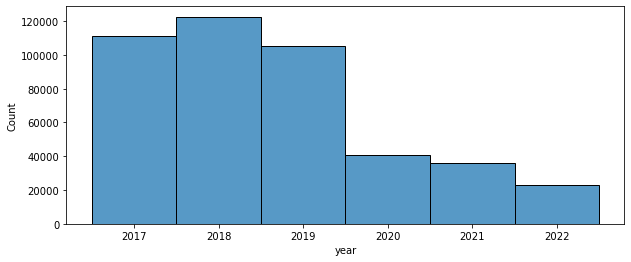

In [218]:
plt.rcParams["figure.figsize"] = (10,4)
sns.histplot(train.year.sort_index(ascending=True))

<AxesSubplot:xlabel='hour', ylabel='Count'>

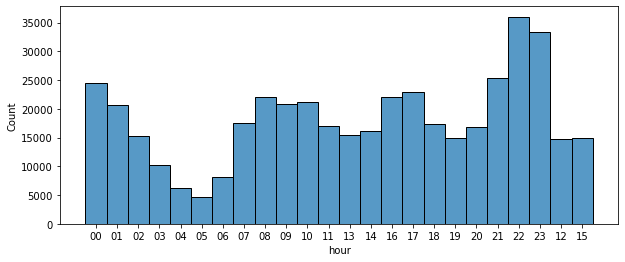

In [219]:
sns.histplot(train.hour.sort_index(ascending=True))

<AxesSubplot:xlabel='month', ylabel='Count'>

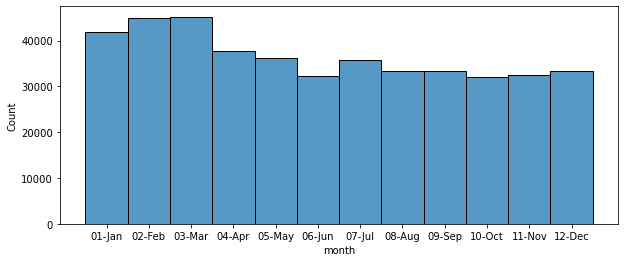

In [220]:
sns.histplot(train.month.sort_index(ascending=True))

In [221]:
hour = pd.crosstab(train.hour, train['Contributed To Accident'], normalize = 'index').sort_index(ascending=False)
day_of_week = pd.crosstab(train.day_of_week, train['Contributed To Accident'], normalize = 'index').sort_index(ascending=False)
month = pd.crosstab(train.month, train['Contributed To Accident'], normalize = 'index').sort_index(ascending=False)
year = pd.crosstab(train.year, train['Contributed To Accident'], normalize = 'index').sort_index(ascending=False)

<AxesSubplot:ylabel='year'>

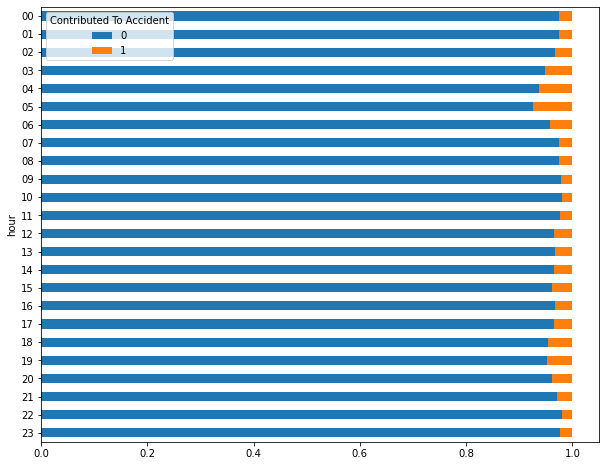

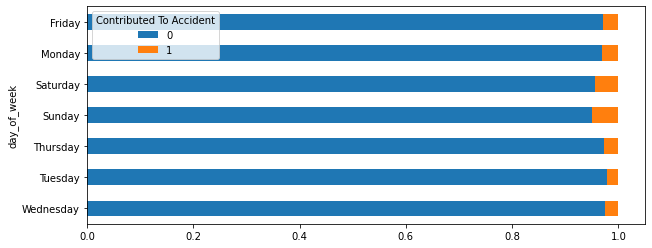

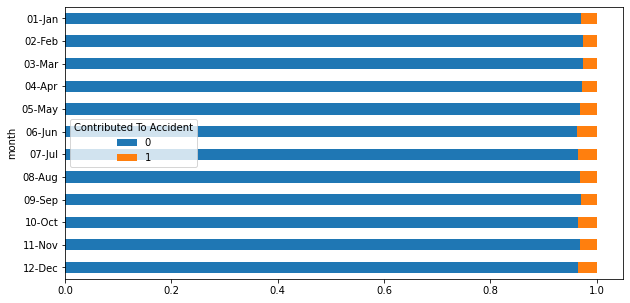

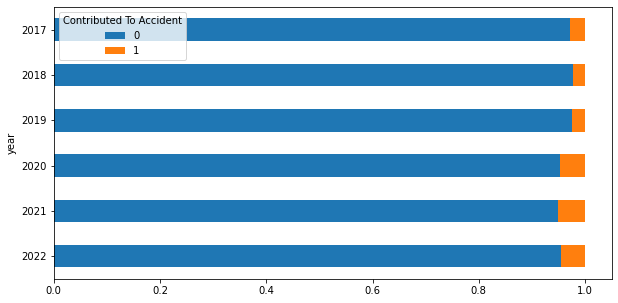

In [222]:
hour.plot.barh(stacked = True, figsize = (10, 8), fontsize = 10)
day_of_week.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)
month.plot.barh(stacked = True, figsize = (10, 5), fontsize = 10)
year.plot.barh(stacked = True, figsize = (10, 5), fontsize = 10)

In [223]:
observed1 = pd.crosstab(train['day_of_week'], train['Contributed To Accident'])
chi21, p1, degf1, expected1 = stats.chi2_contingency(observed1)

alpha = 0.05
if p1 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


### 2. Does contributed to accident relate to race and gender?

<AxesSubplot:xlabel='Gender', ylabel='Count'>

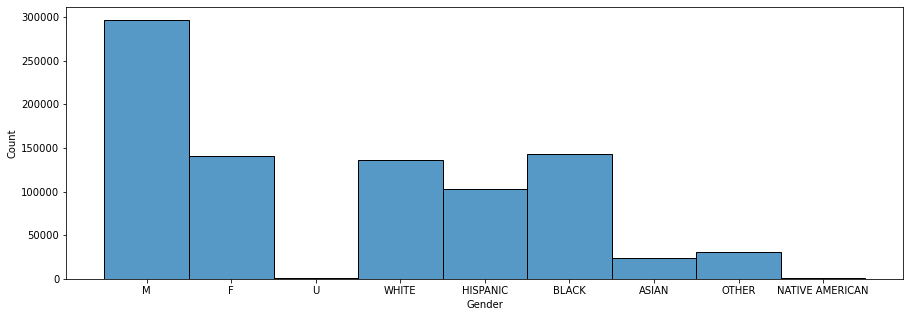

In [224]:
plt.rcParams["figure.figsize"] = (15,5)
sns.histplot(train.Gender)
sns.histplot(train.Race)

* Takeaway:
    1. Gender: male's violation number is female's double.
    2. Race: black, hispanic, white have higher rates.

<AxesSubplot:ylabel='Race'>

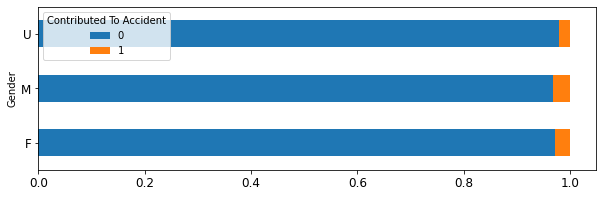

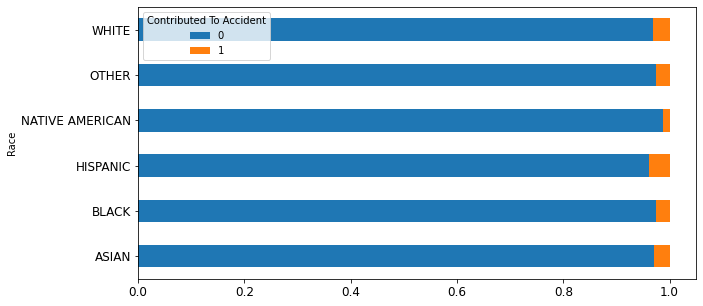

In [225]:
race = pd.crosstab(train.Race, train['Contributed To Accident'], normalize = 'index')
gender = pd.crosstab(train.Gender, train['Contributed To Accident'], normalize = 'index')

gender.plot.barh(stacked = True, figsize = (10, 3), fontsize = 12)
race.plot.barh(stacked = True, figsize = (10, 5), fontsize = 12)

### 3. What about the relationship between contributed to accident and Violation Type? achohol? belts?

<AxesSubplot:ylabel='Belts'>

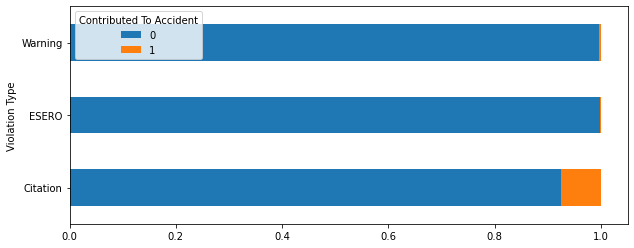

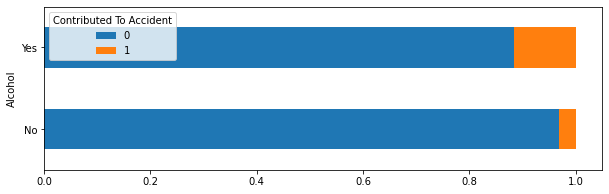

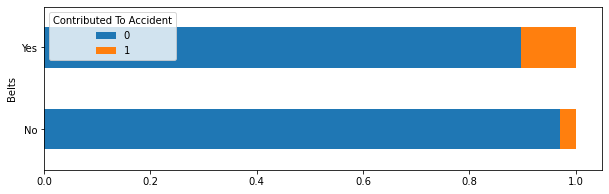

In [226]:
violation = pd.crosstab(train['Violation Type'], train['Contributed To Accident'], normalize = 'index')
alcohol = pd.crosstab(train.Alcohol, train['Contributed To Accident'], normalize = 'index')
belts = pd.crosstab(train.Belts, train['Contributed To Accident'], normalize = 'index')

violation.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)
alcohol.plot.barh(stacked = True, figsize = (10, 3), fontsize = 10)
belts.plot.barh(stacked = True, figsize = (10, 3), fontsize = 10)

Ho : Violation Type and contributed to accident have no association (they are indepemdent).

Ha : Violation Type injuty and contributed to accident have association (they are depemdent).

In [227]:
observed2 = pd.crosstab(train['Violation Type'], train['Contributed To Accident'])
chi22, p2, degf2, expected2 = stats.chi2_contingency(observed2)

alpha = 0.05
if p2 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


Ho : Alcohol and contributed to accident have no association (they are indepemdent).

Ha : Alcohol injuty and contributed to accident have association (they are depemdent).

In [228]:
observed3 = pd.crosstab(train['Alcohol'], train['Contributed To Accident'])
chi23, p3, degf3, expected3 = stats.chi2_contingency(observed3)

alpha = 0.05
if p3 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


### 4. Is personal injury and property damage has relationship with contributed to accident?

<AxesSubplot:ylabel='Personal Injury'>

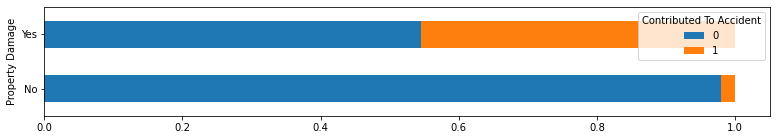

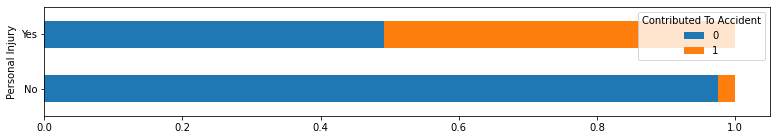

In [229]:
injury = pd.crosstab(train['Personal Injury'], train['Contributed To Accident'], normalize = 'index')
accident = pd.crosstab(train['Property Damage'], train['Contributed To Accident'], normalize = 'index')
accident.plot.barh(stacked = True, figsize = (13, 2), fontsize = 10)
injury.plot.barh(stacked = True, figsize = (13, 2), fontsize = 10)

Ho : Personal injuty and contributed to accident have no association (they are indepemdent).

Ha : Personal injuty and contributed to accident have association (they are depemdent).

In [230]:
observed4 = pd.crosstab(train['Personal Injury'], train['Contributed To Accident'])
chi24, p4, degf4, expected4 = stats.chi2_contingency(observed4)

alpha = 0.05
if p4 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


Ho : property damage and contributed to accident have no association (they are indepemdent).

Ha : property damage and contributed to accident have association (they are depemdent).

In [231]:
observed5 = pd.crosstab(train['Property Damage'], train['Contributed To Accident'])
chi25, p5, degf5, expected5 = stats.chi2_contingency(observed5)

alpha = 0.05
if p5 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


### 5. Is contributed to accident has relationship with agency location?

<AxesSubplot:ylabel='SubAgency'>

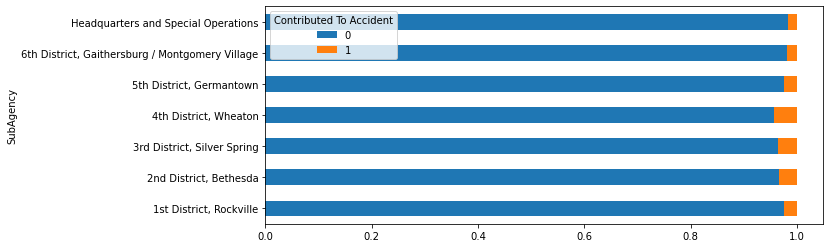

In [232]:
agency = pd.crosstab(train['SubAgency'], train['Contributed To Accident'], normalize = 'index')
agency.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)

In [233]:
observed6 = pd.crosstab(train['SubAgency'], train['Contributed To Accident'])
chi26, p6, degf6, expected6 = stats.chi2_contingency(observed6)

alpha = 0.05
if p6 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


## Summary

* Personal injury, violation type and property damage are the outcomes of the violation, they all have a very strong relationship with terget variable, but our target variable contributed to accident is a outcome of violation too. So I decide to not use those outcomes to predic our target. Therefore, I will use hour, month, weekday, race, gender and alcohol to make my models.

hour, month, weekday, race, gender, alcohol.

## Feature selection

In [234]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

x_train = train[['Alcohol', 'Race','day_of_week', 'hour','Gender','SubAgency','month']]
y_train = train[['Contributed To Accident']]

x_train_dummy_feature = pd.get_dummies(x_train)
y_train_dummy_feature = pd.get_dummies(y_train, drop_first=True)

In [235]:
kbest = SelectKBest(f_regression, k=10)
kbest.fit(x_train_dummy_feature, y_train_dummy_feature)
x_train_dummy_feature.columns[kbest.get_support()]

Index(['Race_BLACK', 'Race_HISPANIC', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Tuesday', 'hour_04', 'hour_05',
       'SubAgency_4th District, Wheaton',
       'SubAgency_6th District, Gaithersburg / Montgomery Village',
       'SubAgency_Headquarters and Special Operations'],
      dtype='object')

* race, day of week, hour, agency location

In [236]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=15)
rfe.fit(x_train_dummy_feature, y_train_dummy_feature)
x_train_dummy_feature.columns[rfe.get_support()]

Index(['SubAgency_5th District, Germantown',
       'SubAgency_6th District, Gaithersburg / Montgomery Village',
       'SubAgency_Headquarters and Special Operations', 'month_01-Jan',
       'month_02-Feb', 'month_03-Mar', 'month_04-Apr', 'month_05-May',
       'month_06-Jun', 'month_07-Jul', 'month_08-Aug', 'month_09-Sep',
       'month_10-Oct', 'month_11-Nov', 'month_12-Dec'],
      dtype='object')

* agency location, month

## Modeling

metric : F1

* select K best: race, day of week, hour, agency location
* RFE: agency location, month

In [237]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [238]:
train['Contributed To Accident'].value_counts()

0    424871
1     13546
Name: Contributed To Accident, dtype: int64

In [260]:
train['baseline'] = 0
baseline_accuracy_train = (train['Contributed To Accident'] == train.baseline).mean()
print(f'baseline accuracy on train set: {baseline_accuracy_train:.2%}')

baseline accuracy on train set: 96.91%


In [261]:
validate['baseline'] = 0
baseline_accuracy_validate = (validate['Contributed To Accident'] == validate.baseline).mean()
print(f'baseline accuracy on train set: {baseline_accuracy_validate:.2%}')

baseline accuracy on train set: 96.82%


## 1. Decision Tree

In [245]:
x_train = train[['Race','day_of_week', 'hour','SubAgency','month']]
y_train = train[['Contributed To Accident']]
x_validate = validate[['Race','day_of_week', 'hour','SubAgency','month']]
y_validate = validate[['Contributed To Accident']]
x_test = test[['Race','day_of_week', 'hour','SubAgency','month']]
y_test = test[['Contributed To Accident']]

x_train = pd.get_dummies(x_train, drop_first=True)
y_train = pd.get_dummies(y_train, drop_first=True)
x_validate = pd.get_dummies(x_validate, drop_first=True)
y_validate = pd.get_dummies(y_validate, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
y_test = pd.get_dummies(y_test, drop_first=True)

In [247]:
# step 1: Creat your recipe
tree = DecisionTreeClassifier(max_depth = 10)

# Step 2: Fit your model to your in-sample data (train)
tree.fit(x_train, y_train)

predictions1 = tree.predict(x_train)

print(classification_report(y_train, predictions1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    424871
           1       0.71      0.03      0.06     13546

    accuracy                           0.97    438417
   macro avg       0.84      0.52      0.52    438417
weighted avg       0.96      0.97      0.96    438417



In [248]:
print('Accuracy of decision tree1 (max_depth=10) classifier on train set: {:.2%}'
     .format(tree.score(x_train, y_train)))

Accuracy of decision tree1 (max_depth=10) classifier on train set: 96.97%


In [249]:
TN1, FP1, FN1, TP1 = confusion_matrix(y_train, predictions1).ravel()
TN1, FP1, FN1, TP1

(424694, 177, 13113, 433)

In [250]:
ALL1 = TP1 + FP1 + FN1 + TN1

accuracy = (TP1 + TN1)/ALL1
true_positive_rate = sensitivity = recall = power = TP1/(TP1+FN1)
false_positive_rate = false_alarm_ratio = fallout = FP1/(FP1+TN1)
true_negative_rate = specificity = selectivity = TN1/(TN1+FP1)
false_negative_rate = miss_rate = FN1/(FN1+TP1)
precision = PPV = TP1/(TP1+FP1)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP1 + FN1
support_neg = FP1 + TN1

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9696863944600689 

True Positive Rate/Sensitivity/Recall/Power: 0.03196515576553964 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0004165970376890868 

True Negative Rate/Specificity/Selectivity: 0.999583402962311 

False Negative Rate/Miss Rate: 0.9680348442344604 

Precision/PPV: 0.7098360655737705 

F1 Score: 0.06117547329754167 

Support (0): 424871 

Support (1): 13546


In [242]:
metrics = []
for i in range(1, 16):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(x_train, y_train)
    
    out_of_sample_accuracy = tree.score(x_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
tree_mc = pd.DataFrame(metrics)
tree_mc["difference"] = tree_mc.train_accuracy - tree_mc.validate_accuracy
tree_mc

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.969102,0.968184,0.000918
1,2,0.969102,0.968184,0.000918
2,3,0.969102,0.968184,0.000918
3,4,0.969102,0.968184,0.000918
4,5,0.969109,0.968168,0.000941
5,6,0.969173,0.968221,0.000952
6,7,0.969283,0.968280,0.001003
7,8,0.969410,0.968301,0.001109
8,9,0.969547,0.968333,0.001214
9,10,0.969686,0.968397,0.001289


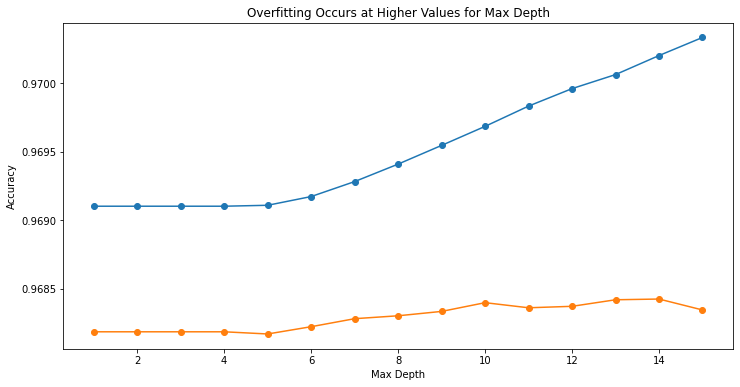

In [243]:
plt.figure(figsize=(12, 6))
plt.plot(tree_mc.max_depth, tree_mc.train_accuracy, marker = 'o')
plt.plot(tree_mc.max_depth, tree_mc.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

* max_depth = 10

## 2. Random forest

In [253]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=28, 
                            min_samples_leaf=1,
                            random_state=123)
rf.fit(x_train, y_train)
predictions2 = rf.predict(x_train)

print(classification_report(y_train, predictions2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    424871
           1       0.79      0.10      0.17     13546

    accuracy                           0.97    438417
   macro avg       0.88      0.55      0.58    438417
weighted avg       0.97      0.97      0.96    438417



In [254]:
print('Accuracy of random forest (max_depth=28) classifier on train set: {:.2%}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest (max_depth=28) classifier on train set: 97.13%


In [255]:
print('Accuracy of random forest (max_depth=28) classifier on train set: {:.2%}'
     .format(rf.score(x_validate, y_validate)))

Accuracy of random forest (max_depth=28) classifier on train set: 96.92%


In [117]:
TN2, FP2, FN2, TP2 = confusion_matrix(y_train, predictions2).ravel()
ALL2 = TP2 + FP2 + FN2 + TN2

accuracy = (TP2 + TN2)/ALL2
true_positive_rate = sensitivity = recal2 = power = TP2/(TP2+FN2)
false_positive_rate = false_alarm_ratio = fallout = FP2/(FP2+TN2)
true_negative_rate = specificity = selectivity = TN2/(TN2+FP2)
false_negative_rate = miss_rate = FN2/(FN2+TP2)
precision = PPV = TP2/(TP2+FP2)
f1_score = 2*(precision*recal2)/(precision+recal2)
support_pos = TP2 + FN2
support_neg = FP2 + TN2

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9716616828270802 

True Positive Rate/Sensitivity/Recall/Power: 0.10458379171250458 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0005061419740007816 

True Negative Rate/Specificity/Selectivity: 0.9994938580259992 

False Negative Rate/Miss Rate: 0.8954162082874955 

Precision/PPV: 0.8689823278488726 

F1 Score: 0.18669808850484418 

Support (0): 424782 

Support (1): 13635


In [251]:
metrics = []
# .sample(10000, random_state=123)
for i in range(10,30):
    rf = RandomForestClassifier(max_depth=(i), 
                            min_samples_leaf=1,
                            random_state=123)
    
    rf = rf.fit(x_train, y_train)
    
    in_sample_accuracy = rf.score(x_train, y_train)
    
    out_of_sample_accuracy = rf.score(x_validate, y_validate)
    
    output = {"max_depth": (i),"min_sample_lead" :1,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metrics.append(output)
    
rf_mc = pd.DataFrame(metrics)
rf_mc["difference"] = rf_mc.train_accuracy - rf_mc.validate_accuracy
rf_mc

,max_depth,min_sample_lead,train_accuracy,validate_accuracy,difference
0,10,1,0.969102,0.968184,0.000918
1,11,1,0.969102,0.968184,0.000918
2,12,1,0.969114,0.968190,0.000924
3,13,1,0.969114,0.968190,0.000924
4,14,1,0.969114,0.968190,0.000924
5,15,1,0.969155,0.968205,0.000949
6,16,1,0.969212,0.968237,0.000975
7,17,1,0.969296,0.968280,0.001016
8,18,1,0.969363,0.968354,0.001008
9,19,1,0.969495,0.968456,0.001039


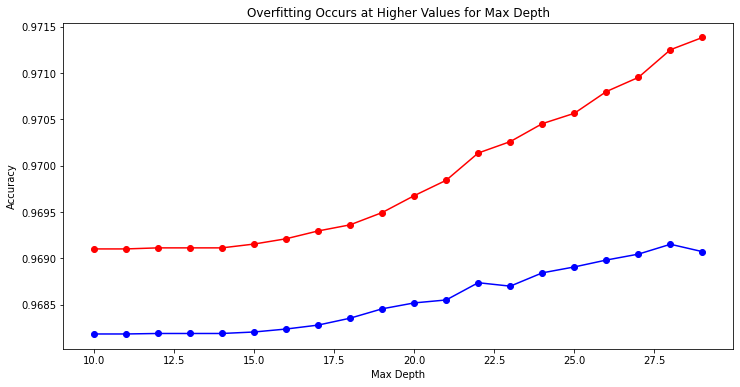

In [252]:
plt.figure(figsize=(12, 6))
plt.plot(rf_mc.max_depth, rf_mc.train_accuracy, color = 'r', marker = 'o')
plt.plot(rf_mc.max_depth, rf_mc.validate_accuracy, color = 'b', marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

* max_depth = 25

### 3. Logistic Regression

In [256]:
y_train['Contributed To Accident'].value_counts()

0    424871
1     13546
Name: Contributed To Accident, dtype: int64

df[df['target’] == 0].sample(10_000]

In [212]:
# a = df[df['Contributed To Accident'] == 0].sample(20_000)
# b = df[df['Contributed To Accident'] == 1].sample(20_000)
# c = a.append(b)

In [213]:
# x_train1 = c[['Race','day_of_week', 'hour','SubAgency','Gender','month']]
# y_train1 = c[['Contributed To Accident']]

# x_train1 = pd.get_dummies(x_train1, drop_first=True)
# y_train1 = pd.get_dummies(y_train1, drop_first=True)

In [257]:
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

#  fit the model on train data
logit.fit(x_train, y_train)

# now use the model to make predictions
predictions3 = logit.predict(x_train)

print(classification_report(y_train, predictions3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    424871
           1       0.00      0.00      0.00     13546

    accuracy                           0.97    438417
   macro avg       0.48      0.50      0.49    438417
weighted avg       0.94      0.97      0.95    438417



In [258]:
print('Accuracy of Logistic Regression (c=1) on train set: {:.2%}'
     .format(logit.score(x_train, y_train)))

Accuracy of Logistic Regression (c=1) on train set: 96.91%


In [259]:
TN3, FP3, FN3, TP3 = confusion_matrix(y_train, predictions3).ravel()
ALL3 = TP3 + FP3 + FN3 + TN3

accuracy = (TP3 + TN3)/ALL3
true_positive_rate = sensitivity = recal3 = power = TP3/(TP3+FN3)
false_positive_rate = false_alarm_ratio = fallout = FP3/(FP3+TN3)
true_negative_rate = specificity = selectivity = TN3/(TN3+FP3)
false_negative_rate = miss_rate = FN3/(FN3+TP3)
precision = PPV = TP3/(TP3+FP3)
f1_score = 2*(precision*recal3)/(precision+recal3)
support_pos = TP3 + FN3
support_neg = FP3 + TN3

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9691024754970724 

True Positive Rate/Sensitivity/Recall/Power: 0.0 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0 

True Negative Rate/Specificity/Selectivity: 1.0 

False Negative Rate/Miss Rate: 1.0 

Precision/PPV: nan 

F1 Score: nan 

Support (0): 424871 

Support (1): 13546


In [120]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.025, random_state=123)
svm.fit(x_train,y_train)
predictions4 = svm.predict(x_train)

print(classification_report(y_train, predictions4))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    424782
           1       0.00      0.00      0.00     13635

    accuracy                           0.97    438417
   macro avg       0.48      0.50      0.49    438417
weighted avg       0.94      0.97      0.95    438417



In [263]:
print(f'baseline accuracy on train set: {baseline_accuracy_train:.2%}')
print('Accuracy of decision tree (max_depth=10) classifier on train set: {:.2%}'
     .format(tree.score(x_train, y_train)))
print('Accuracy of random forest (max_depth=28) classifier on train set: {:.2%}'
     .format(rf.score(x_train, y_train)))
print('Accuracy of Logistic Regression (c=1) on train set: {:.2%}'
     .format(logit.score(x_train, y_train)))

baseline accuracy on train set: 96.91%
Accuracy of decision tree (max_depth=10) classifier on train set: 96.97%
Accuracy of random forest (max_depth=28) classifier on train set: 97.13%
Accuracy of Logistic Regression (c=1) on train set: 96.91%


## Validate

In [264]:
# predict on validate
y_pred_tree_validate = tree.predict(x_validate)
y_pred_rf_validate = rf.predict(x_validate)
y_pred_logistic_validate = logit.predict(x_validate)

# evaluate on validate
print(f'baseline accuracy on train set: {baseline_accuracy_validate:.2%}')
print('Accuracy of decision tree (max_depth = 10) classifier on validate set: {:.2%}'
     .format(tree.score(x_validate, y_validate)))
print('Accuracy of random forest (max_depth=28) classifier on validate set: {:.2%}'
     .format(rf.score(x_validate, y_validate)))
print('Accuracy of Logistic Regression (c=1) on validate set: {:.2%}'
     .format(logit.score(x_validate, y_validate)))

baseline accuracy on train set: 96.82%
Accuracy of decision tree (max_depth = 10) classifier on validate set: 96.84%
Accuracy of random forest (max_depth=28) classifier on validate set: 96.92%
Accuracy of Logistic Regression (c=1) on validate set: 96.82%


## Test

In [265]:
# predict on test
y_pred_test = rf.predict(x_test)

# evaluate on test
print('Accuracy of random forest (max_depth = 28) on test set: {:.2%}'
     .format(rf.score(x_test, y_test)))

Accuracy of random forest (max_depth = 28) on test set: 96.99%


In [333]:
print(f'baseline accuracy on train set: {baseline_accuracy:.2%}')

baseline accuracy on train set: 96.89%
